# Hotel Booking Dataset EDA

This notebook uses exploratory data analysis (EDA) on a hotel booking dataset to identify trends in guest behavior and booking trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


# Step 1: Loading the Dataset
Load the data and analyze its structure.

In [2]:
# loading the dataset
data_file = pd.read_csv("first inten project.csv")

# printing basic information
print("Shape: " , data_file.shape)
print("First 5 rows: "); print(data_file.head());
print("Data types: "); print(data_file.dtypes);


Shape:  (36285, 17)
First 5 rows: 
  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repea

# Step 2: Booking Status Distribution
See the proportion of confirmed vs canceled reservations.

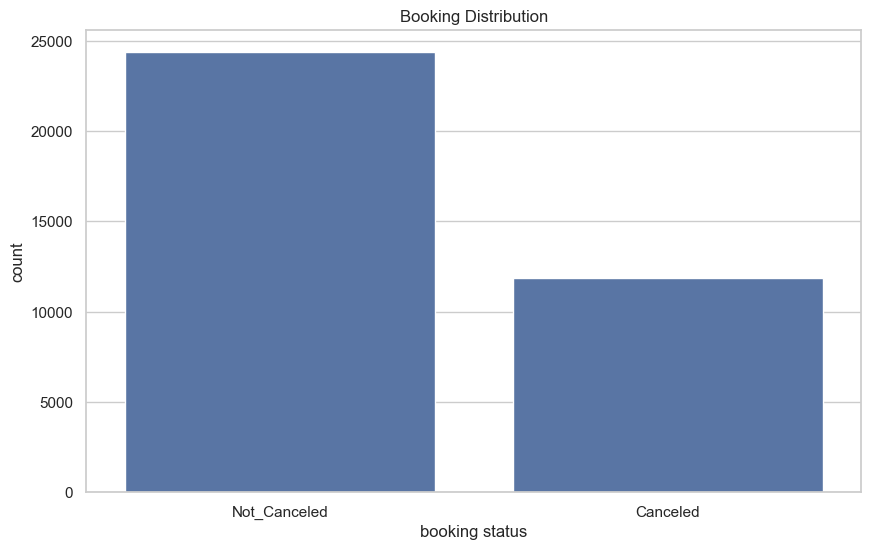

In [3]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.countplot(x="booking status" , data = data_file)
plt.title("Booking Distribution")
plt.show()

# Step 3: Lead Time Distribution
The term "lead time" describes the number of days before the reservation was made.

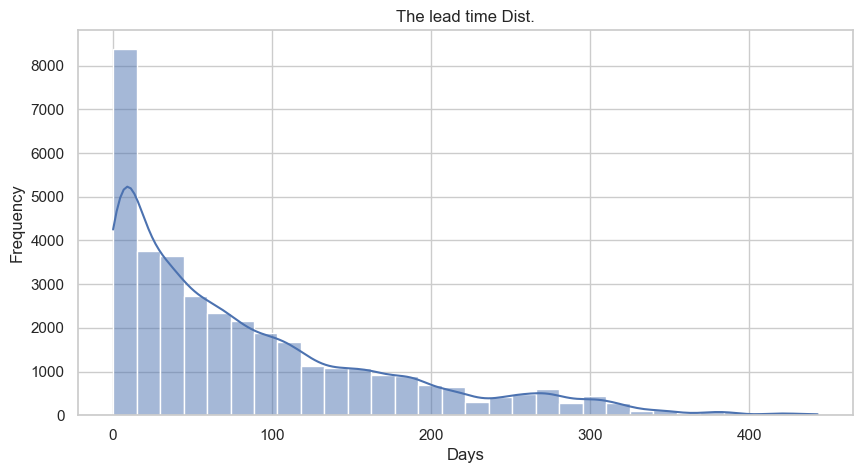

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(data_file['lead time'], bins = 30 , kde = True)
plt.title("The lead time Dist.")
plt.xlabel("Days"); plt.ylabel("Frequency")
plt.show()

# Step 4: Type of Meal Distribution
Recognize the food preferences of the guests.

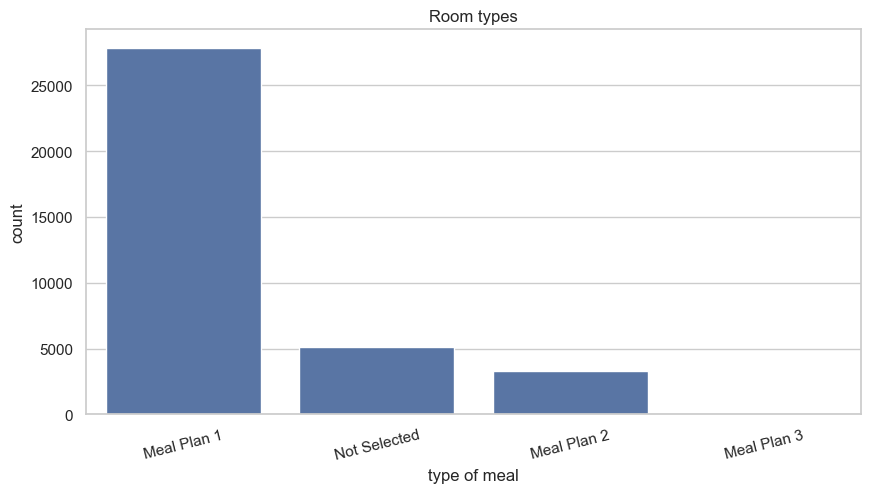

In [5]:
plt.figure(figsize=(10,5));
sns.countplot(x = 'type of meal', data = data_file, order= data_file["type of meal"].value_counts().index)
plt.title("Room types")
plt.xticks(rotation = 14)
plt.show()

# Step 5: The Average Price Distribution
Examine the booking prices.

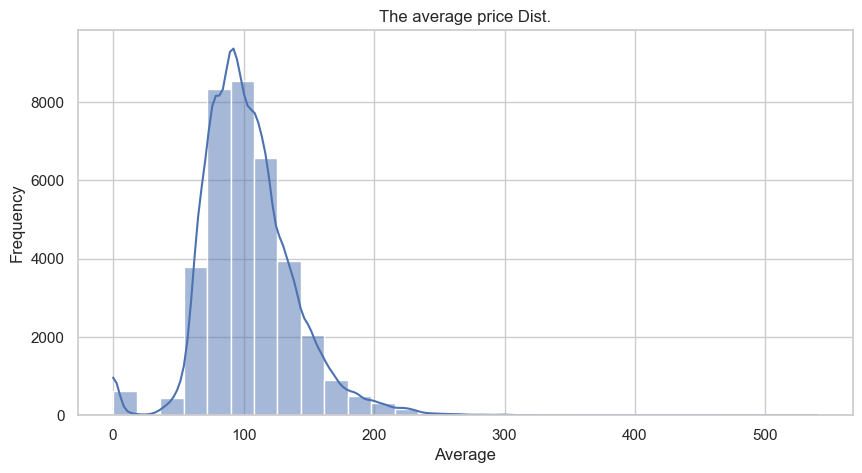

In [6]:
plt.figure(figsize=(10,5))
data_file.columns = [col.strip().lower() for col in data_file.columns]
sns.histplot(data_file['average price'], bins = 30 , kde = True)
plt.title("The average price Dist.")
plt.xlabel("Average")
plt.ylabel("Frequency")
plt.show()

# Step 6: Number of Special Requests
How many special requests do guests often make?

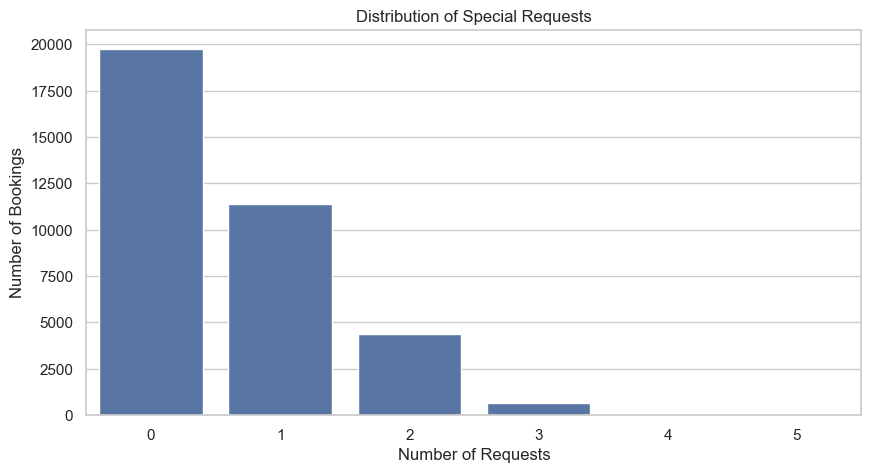

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='special requests', data=data_file)
plt.title("Distribution of Special Requests")
plt.xlabel("Number of Requests")
plt.ylabel("Number of Bookings")
plt.show()

# Step 7: Monthly Booking Trends
Analyze the booking patterns by reservation month.

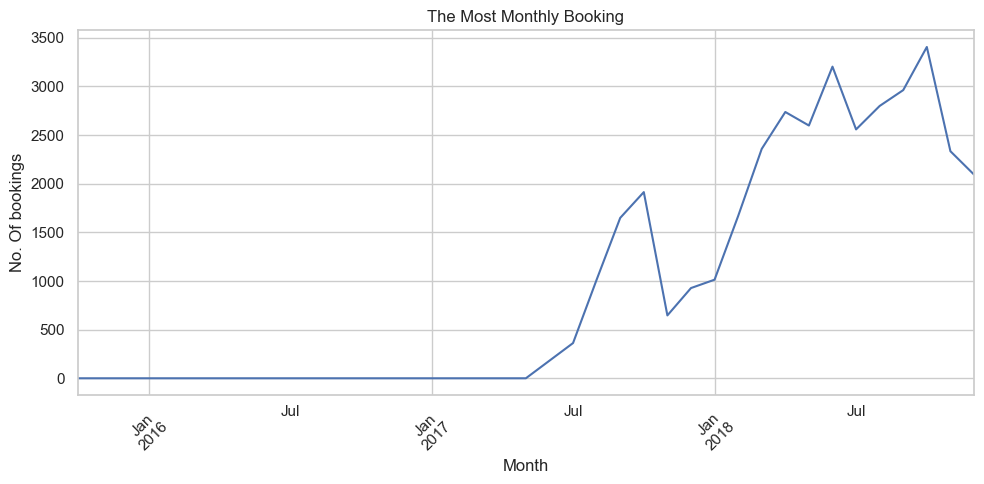

In [8]:
plt.figure(figsize=(10,5))
data_file['date of reservation'] = pd.to_datetime(data_file['date of reservation'], errors='coerce')
data_file['reservation_month'] = data_file['date of reservation'].dt.to_period("M")
data_file["reservation_month"].value_counts().sort_index().plot()
plt.title("The Most Monthly Booking")
plt.xlabel("Month")
plt.ylabel("No. Of bookings")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Step 8: Feature Correlation Heatmap
Analyze the correlations between numerical features.

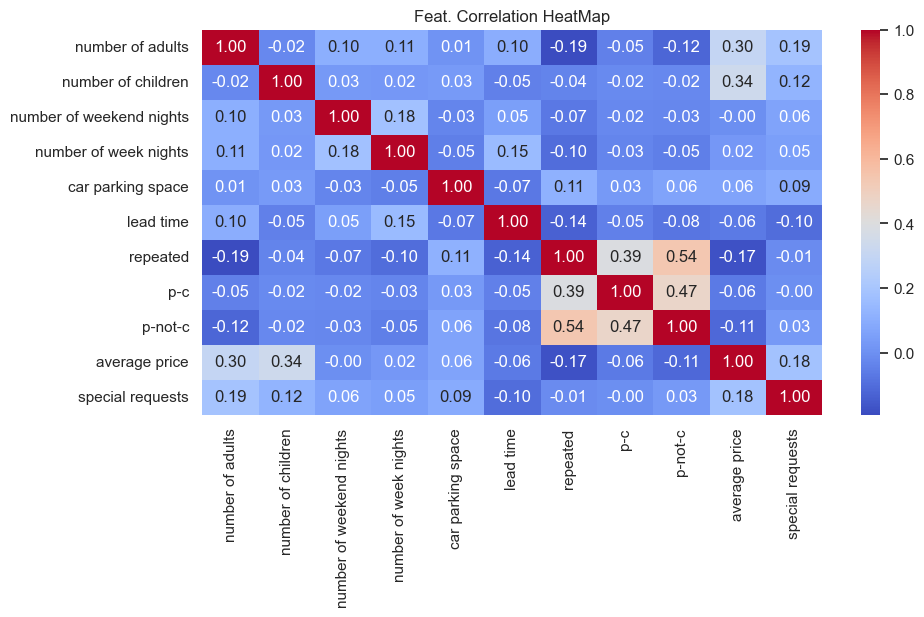

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data_file.select_dtypes(include=['int64' , 'float64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feat. Correlation HeatMap")
plt.show()